In [28]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('ReallyCleanData')
#nm = pd.read_csv('Urls.csv')

# Further Cleaning ...oops...

In [48]:
df = df[df != '.']

In [53]:
df.born_out_state = df.born_out_state.astype('float')
df.avg_household_size = df.avg_household_size.astype('float')
df.F_never_married = df.F_never_married.astype('float')
df.M_never_married = df.M_never_married.astype('float')
df.speak_poor_english = df.speak_poor_english.astype('float')
df.with_mortgage = df.with_mortgage.astype('float')
df.single_mothers = df.single_mothers.astype('float')

In [54]:
df.dtypes

name                   object
area                  float64
avg_household_size    float64
cars_per_apartment    float64
cars_per_house        float64
M_median_age          float64
F_median_age          float64
median_income         float64
median_rent           float64
F_never_married       float64
M_never_married       float64
born_in_state         float64
born_out_state        float64
speak_poor_english    float64
foriegn_born          float64
married               float64
with_mortgage         float64
single_mothers        float64
population            float64
male_population       float64
female_population     float64
address                object
coords                 object
cluster                 int32
dtype: object

# Test 1

## 1. Select Fields

### I chose these fields because I want to see how income compares to the other factors. I chose to not include the columns "born_in_state" and "born_out_state" because I didn't think they would were relevant to income. 

In [87]:
cols = ['median_income','avg_household_size','median_rent','with_mortgage','single_mothers','married','speak_poor_english','cars_per_apartment','cars_per_house','M_median_age','F_median_age']

## 2. Normalize Data

In [88]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df[cols])

## 3. Find Clusters

### The elbow seems to be around 8 so I will be using 8 clusters

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

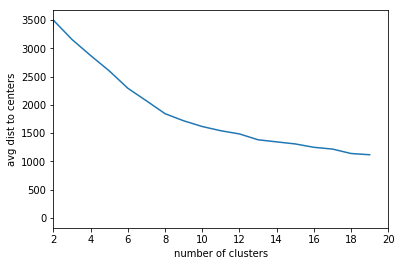

In [89]:
from sklearn.cluster import KMeans

max_n_clusters = 20
squared_distance = np.zeros(max_n_clusters)
for k in range(2,max_n_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(X)
    squared_distance[k] = kmeans.inertia_
    print(k,sep=' ', end=' ', flush=True)
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(squared_distance)
plt.xlim((2,max_n_clusters))
plt.xlabel('number of clusters')
plt.ylabel('avg dist to centers')
plt.show()

## 4. Run Clustering

In [90]:
km = KMeans(n_clusters = 8, random_state = 0).fit(X)
km.fit(df[cols])

df['cluster'] = km.labels_

df.groupby('cluster')[cols].mean().sort_values(by='median_income')

,median_income,avg_household_size,median_rent,with_mortgage,single_mothers,married,speak_poor_english,cars_per_apartment,cars_per_house,M_median_age,F_median_age
cluster,,,,,,,,,,,
5,26890.794872,3.676923,593.820513,63.584615,28.453846,25.394872,12.253846,1.974359,2.179487,29.112821,30.646154
1,39782.900000,6.464286,680.228571,67.561429,18.230000,32.844286,5.870000,1.391429,3.175714,31.727143,36.837143
3,48911.234694,4.371429,736.030612,68.107143,15.117347,41.564286,3.859184,2.069388,2.043878,36.625510,40.189796
0,58582.212500,7.021250,707.212500,68.498750,13.118750,41.191250,4.573750,1.577500,2.373750,37.410000,40.521250
6,69702.326923,3.230769,723.307692,72.713462,7.861538,49.953846,1.963462,2.701923,1.969231,38.226923,40.380769
4,81167.444444,2.725926,811.037037,70.429630,7.322222,51.874074,4.422222,1.474074,2.025926,39.688889,42.800000
2,99339.071429,5.321429,809.357143,64.171429,8.242857,62.307143,2.385714,3.492857,1.871429,46.450000,48.835714
7,136576.000000,2.800000,634.000000,85.600000,6.300000,68.600000,0.200000,1.300000,2.000000,42.200000,38.700000


## 5. Interperet Clustering

### By sorting the clusters by income I see some interesting trends. I see that clusters with higher incomes have a higher median age, rent, marriage %, and cars per apartment. Clusters with lower incomes have a higher % of people who speak poor english and high single motherhood and lower ages. It seems % with mortgaage is not affected by income and household size are higher in medium income clusters.

# Test 2

### For this test I want to keep the same factors but double the number of cluster.

In [93]:
km = KMeans(n_clusters = 16, random_state = 0).fit(X)
km.fit(df[cols])

df['cluster'] = km.labels_

df.groupby('cluster')[cols].mean().sort_values(by='median_income')

,median_income,avg_household_size,median_rent,with_mortgage,single_mothers,married,speak_poor_english,cars_per_apartment,cars_per_house,M_median_age,F_median_age
cluster,,,,,,,,,,,
13,35.000000,35.000000,35.000000,35.000000,35.000000,53.600000,35.000000,1.800000,2.200000,40.200000,45.800000
8,19586.500000,2.775000,563.000000,70.262500,21.637500,21.737500,19.525000,1.825000,1.937500,26.000000,26.100000
14,27652.615385,2.784615,616.461538,61.546154,23.284615,21.246154,7.392308,2.815385,2.246154,31.261538,34.407692
4,32210.458333,3.195833,627.583333,65.508333,31.629167,29.204167,11.804167,1.416667,5.550000,28.429167,30.058333
15,38089.344828,4.206897,671.137931,65.579310,22.572414,32.758621,4.534483,1.627586,1.993103,32.617241,34.403448
1,42405.542857,8.751429,693.057143,68.534286,13.451429,33.522857,5.391429,1.171429,2.042857,31.705714,39.708571
9,47022.870370,4.292593,762.888889,67.764815,17.262963,40.237037,4.331481,2.425926,2.127778,36.175926,41.411111
2,51385.186047,4.513953,706.395349,68.706977,12.553488,43.304651,3.309302,1.651163,1.937209,37.200000,38.730233
6,55846.064516,6.203226,715.451613,69.267742,18.038710,36.590323,3.590323,1.977419,2.648387,38.329032,38.841935


## Interperet Clustering

### By doubling the number of cluster, the trends are less consistent. A few string trends that are not affected are the the decreasing single motherhood, % speaking poor english, and higher % married and % with mortgage. It appears that with more cluster, age and number of cars per house/apartment are more randomized.

# Test 3

### For this test I want to see how single motherhood affects the chosen factors. I chose to leave out "percent married" because we are looking at single motherhood. I also left out "income" because we have already tested its effects.

## 1. Select Fields

In [102]:
cols = ['avg_household_size','median_rent','with_mortgage','single_mothers','M_median_age','F_median_age','speak_poor_english']

## 2. Normalize Data

In [103]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df[cols])

## 3. Find Clusters

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

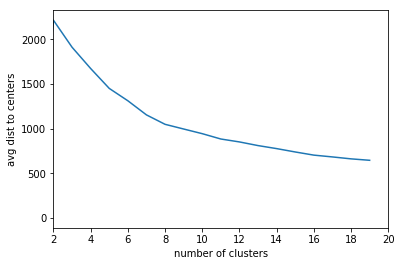

In [104]:
from sklearn.cluster import KMeans

max_n_clusters = 20
squared_distance = np.zeros(max_n_clusters)
for k in range(2,max_n_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(X)
    squared_distance[k] = kmeans.inertia_
    print(k,sep=' ', end=' ', flush=True)
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(squared_distance)
plt.xlim((2,max_n_clusters))
plt.xlabel('number of clusters')
plt.ylabel('avg dist to centers')
plt.show()

## 4. Run Clustering

In [109]:
km = KMeans(n_clusters = 6, random_state = 0).fit(X)
km.fit(df[cols])

df['cluster'] = km.labels_

df.groupby('cluster')[cols].mean().sort_values(by='single_mothers')

,avg_household_size,median_rent,with_mortgage,single_mothers,M_median_age,F_median_age,speak_poor_english
cluster,,,,,,,
1,6.076744,805.209302,68.145349,9.502326,37.884884,42.222093,4.018605
5,5.679167,632.358333,68.929167,13.711667,35.340000,38.545833,4.139167
3,2.855556,926.722222,69.213889,14.550000,36.608333,41.677778,2.341667
2,2.941667,548.527778,68.938889,16.116667,33.061111,34.450000,10.088889
0,4.481373,712.578431,67.546078,20.033333,35.716667,38.126471,5.521569
4,35.000000,35.000000,35.000000,35.000000,40.200000,45.800000,35.000000


## 5. Interperet Clustering

### It appears that as single motherhood generally househld size decreases, rent decreases. There are no clear trends for age, % with mortgage and % speaking poor english. Overall I think for this test I need to do more modifications to the fields I slected, and maybe choose different number of clusters.